In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
#read in dataset
apps_with_duplicates = pd.read_csv("/Users/jadesolaakinola/Documents/5. DATA/Datacamp/The Android App Market on Google Play/datasets/apps.csv", index_col=0)
apps_with_duplicates

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [108]:
apps = apps_with_duplicates.drop_duplicates()
print('total number of apps:',len(apps['App'].unique()))

total number of apps: 9659


In [109]:
#random sample of the dataset
apps.sample(5, random_state=2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9662,EO LAC,LIFESTYLE,NaN,0,18.0,10+,Free,0,Everyone,Lifestyle,"January 17, 2017",1.1,4.1 and up
9274,EF English Live for phone,FAMILY,3.6,2210,15.0,"100,000+",Free,0,Everyone,Education,"July 24, 2018",3.1.0,5.0 and up
10028,Garden Fever - Free!,FAMILY,3.9,13253,12.0,"1,000,000+",Free,0,Everyone,Puzzle,"August 9, 2016",2.1.080,2.3 and up
8504,DK TEL Dialer,COMMUNICATION,NaN,0,4.2,50+,Free,0,Everyone,Communication,"November 26, 2017",3.8.8,2.2 and up
8539,IDM Internet Download Manager,PRODUCTIVITY,3.9,1322,4.2,"100,000+",Free,0,Everyone,Productivity,"October 25, 2016",1.0.4,4.2 and up


In [110]:
reviews = pd.read_csv("/Users/jadesolaakinola/Documents/5. DATA/Datacamp/The Android App Market on Google Play/datasets/user_reviews.csv")
reviews

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


Data cleaning

In [112]:
chars_to_remove = ['+', '-', '$']
cols_to_clean = ['Installs', 'Price']

for char in chars_to_remove:
    for col in cols_to_clean:
        apps[col] = apps[col].str.replace(char, '')


In [125]:
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB
None


Correcting Data Types

In [132]:
for col in cols_to_clean:
    apps[col] = apps[col].str.replace(',','')
    apps[col] = apps[col].astype(float)

In [135]:
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB
None


In [141]:
num_categories = len(apps['Category'].unique())
print('number of unique app categories:',num_categories)

number of unique app categories: 33


In [147]:
sorted_num_apps_in_category = apps.groupby('Category')['App'].count().sort_values(ascending=False)
sorted_num_apps_in_category

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

<Figure size 600x1200 with 0 Axes>

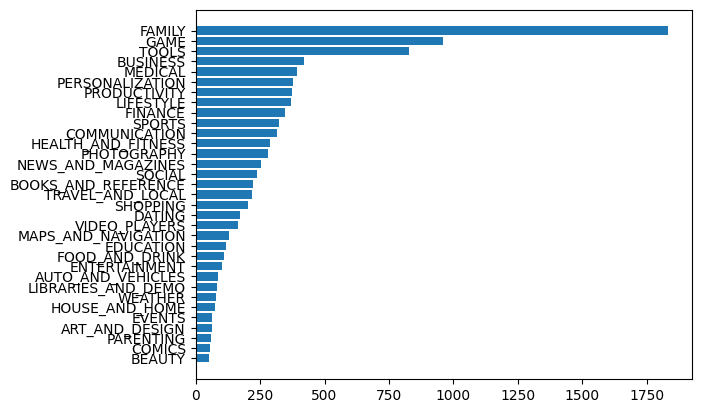

<Figure size 600x1200 with 0 Axes>

In [174]:
plt.barh(sorted_num_apps_in_category.index[::-1], sorted_num_apps_in_category.values[::-1])
plt.figure(figsize=(6,12))

Interesting insights
1. The Family Category has the highest share of apps in the market with 1832, followed by Games with 959
2. Beauty has the fewest number of apps, with only 53

In [190]:
avg_app_rating = apps['Rating'].mean()
print('average app rating:', avg_app_rating)

average app rating: 4.173243045387994


In [196]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 23.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


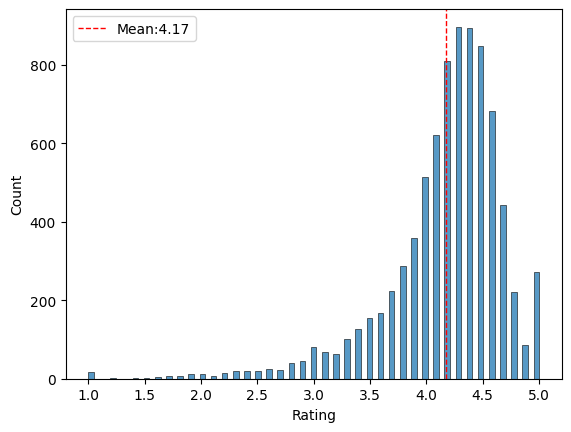

In [208]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

sns.histplot(data=apps, x='Rating')
plt.axvline(avg_app_rating, color='red', linestyle='--', linewidth=1, label=f'Mean:{avg_app_rating:.2f}')
plt.legend()

Text(4.3, 0.1, 'Median: 4.30')

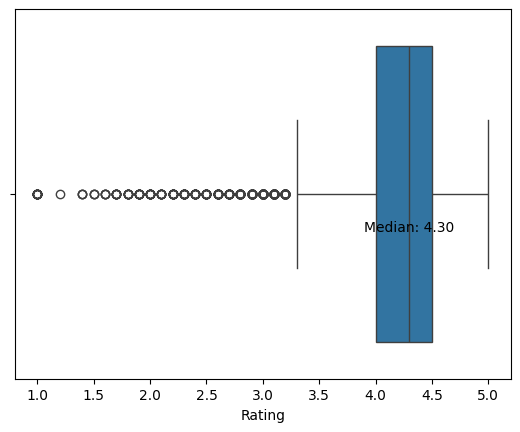

In [189]:
sns.boxplot(data=apps, x='Rating')
median = apps['Rating'].median()
plt.annotate(f'Median: {median:.2f}',
             xy=(median,0),
             xytext=(median,0.1),
             horizontalalignment='center')

In [209]:
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [214]:
apps_with_size_and_rating_present = apps.dropna(axis=0, subset=['Rating', 'Size'])

In [217]:
apps_with_size_and_rating_present[['Rating', 'Size']].isna().sum()

Rating    0
Size      0
dtype: int64

In [236]:
large_categories = []

for cat in large_categories:
    if apps_with_size_and_rating_present['Category'].value_counts() > 250:
        large_categories = large_categories[cat]

In [237]:
large_categories

[]

In [245]:
sorted_apps_with_size_and_rating = apps_with_size_and_rating_present['Category'].value_counts()

In [353]:
large_categories = sorted_apps_with_size_and_rating[sorted_apps_with_size_and_rating >= 250].index
large_categories = pd.DataFrame(large_categories)
large_categories

,Category
0,FAMILY
1,GAME
2,TOOLS
3,PERSONALIZATION
4,LIFESTYLE
5,MEDICAL
6,FINANCE


Text(0.5, 1.0, 'Relationship between Size and Rating')

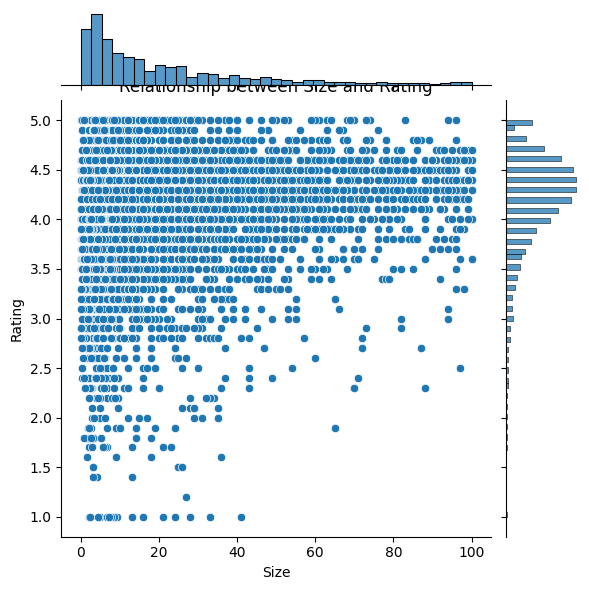

In [352]:
sns.jointplot(data=apps_with_size_and_rating_present, x='Size', y='Rating')
plt.title('Relationship between Size and Rating')

In [272]:
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']
paid_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Paid,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Paid,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Paid,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Paid,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Paid,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.6,1000.0,Paid,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6,500.0,Paid,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Paid,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Paid,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up


Text(0.5, 1.0, 'Relationship between Price and Rating')

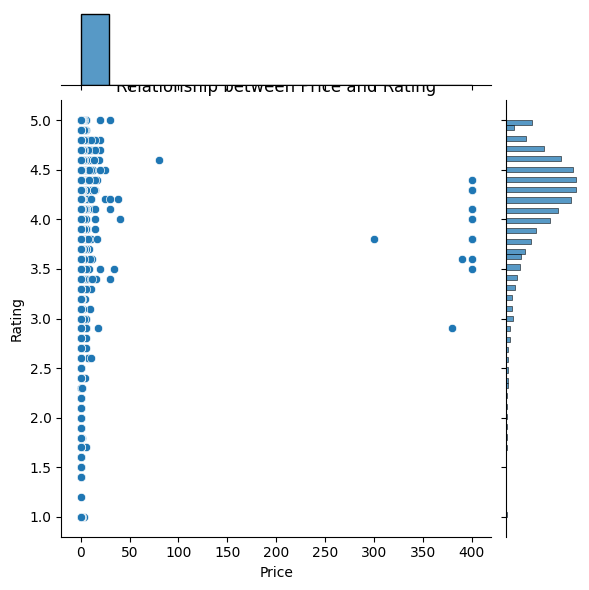

In [351]:
sns.jointplot(data=apps_with_size_and_rating_present, x='Price', y='Rating')
plt.title('Relationship between Price and Rating')

Insights
1. There is a high concerntration of apps that are very limited in size receiving top ratings.
2. Most of the apps are less than 40 in size, but there are still a number of apps above 40. This may show that users prefer light-weighted apps
3. The plot shows that the majority of apps are under 0, and so this suggests that consumers tend not to pay for apps

In [283]:
apps['Price'].value_counts()

Price
0.00      8903
0.99       145
2.99       124
1.99        73
4.99        70
          ... 
18.99        1
389.99       1
19.90        1
1.75         1
1.04         1
Name: count, Length: 92, dtype: int64

In [286]:
paid_apps = apps[apps['Type'] == 'Paid']

Text(0.5, 1.0, 'App pricing trend across categories')

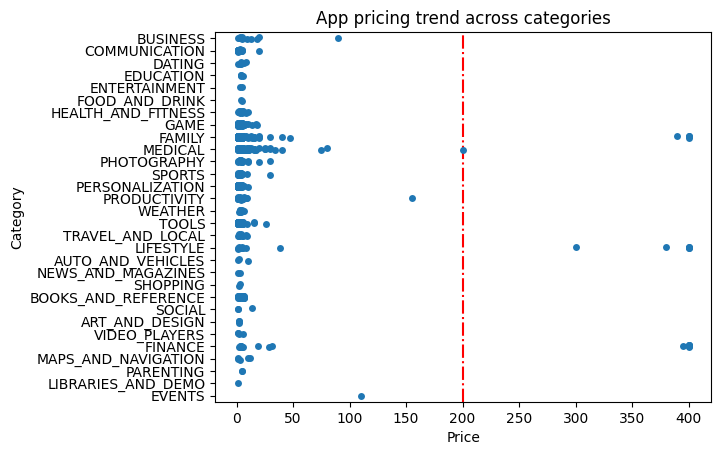

In [347]:
sns.stripplot(data=paid_apps, x='Price', y='Category')
plt.axvline(200, color='red', linestyle='-.')
plt.title('App pricing trend across categories')

In [310]:
print(paid_apps[['Category', 'App', 'Price']][paid_apps['Price'] > 200])


       Category                                App   Price
4197     FAMILY             most expensive app (H)  399.99
4362  LIFESTYLE                         💎 I'm rich  399.99
4367  LIFESTYLE           I'm Rich - Trump Edition  400.00
5351  LIFESTYLE                          I am rich  399.99
5354     FAMILY                     I am Rich Plus  399.99
5355  LIFESTYLE                      I am rich VIP  299.99
5356    FINANCE                  I Am Rich Premium  399.99
5357  LIFESTYLE                I am extremely Rich  379.99
5358    FINANCE                         I am Rich!  399.99
5359    FINANCE                 I am rich(premium)  399.99
5362     FAMILY                      I Am Rich Pro  399.99
5364    FINANCE     I am rich (Most expensive app)  399.99
5366     FAMILY                          I Am Rich  389.99
5369    FINANCE                          I am Rich  399.99
5373    FINANCE                 I AM RICH PRO PLUS  399.99
9917    FINANCE                        Eu Sou Rico  394.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

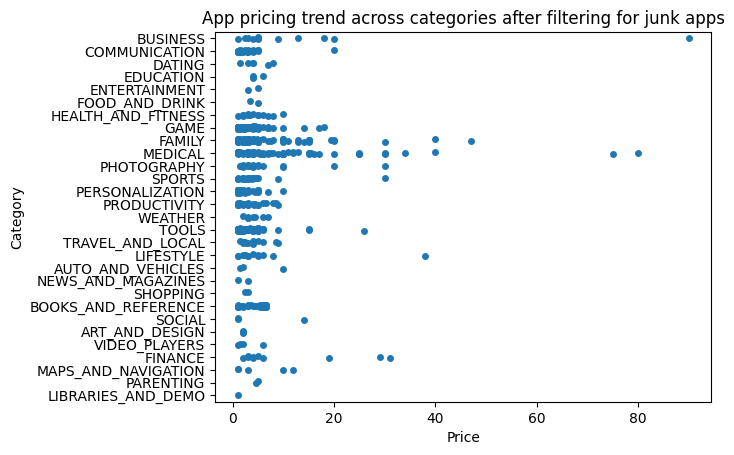

In [346]:
apps_under_100 = paid_apps[paid_apps['Price'] < 100]
apps_under_100
sns.stripplot(data=apps_under_100, x='Price', y='Category')
plt.title('App pricing trend across categories after filtering for junk apps')

In [316]:
apps['Type'].value_counts()

Type
Free    8903
Paid     756
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of downloads of paid apps vs. free apps')

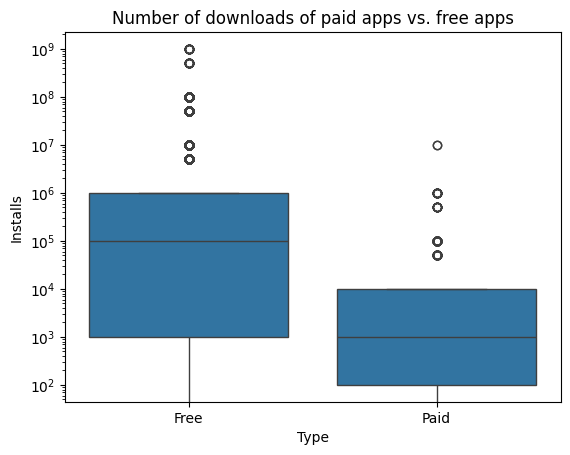

In [359]:
sns.boxplot(data=apps, x='Type', y='Installs').set_yscale('log')
plt.title('Number of downloads of paid apps vs. free apps')

In [325]:
reviews

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [342]:
merged_df = apps.merge(reviews, how='left', on='App')
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70190,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,NaN,NaN,NaN,NaN
70191,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up,NaN,NaN,NaN,NaN
70192,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up,NaN,NaN,NaN,NaN
70193,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,NaN,NaN,NaN,NaN


In [330]:
print('apps shape:', apps.shape)
print('reviews shape:', reviews.shape)

apps shape: (9659, 13)
reviews shape: (64295, 5)


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

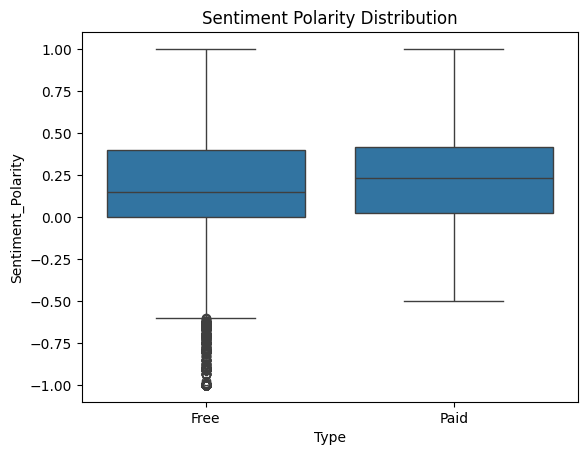

In [344]:
sns.boxplot(data=merged_df, x='Type', y='Sentiment_Polarity')
plt.title('Sentiment Polarity Distribution')

The boxplot highlights that paid apps on average have better sentiments from consumer, with a higher median sentiment polarity. Also, there are mainly outliers of negative sentiment with the Free apps